# ML Answers

- **Answer Set**: No. 01
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps

### Libraries

Before begin, we must import these required libraries:

- **numpy**: Linear algebra computations
- **matplotlib**: Drawing 2D and 3D plots

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

Now we can load our dataset:

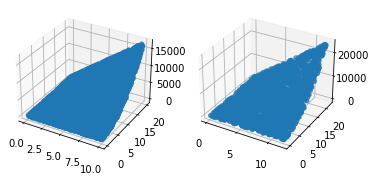

In [108]:
data = np.load("../lib/data.npz")

x1 = data["x1"]
x2 = data["x2"]
y = data["y"]

x1_test = data["x1_test"]
x2_test = data["x2_test"]
y_test = data["y_test"]

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

ax1.scatter3D(x1, x2, y)
ax2.scatter3D(x1_test, x2_test, y_test)

plt.show()

### Functions

Now we must define some basic functions that will be used in the next few steps:

In [110]:
def cost_function(X, Y, W):
    R = (X @ W) - Y
    return (1 / (2 * len(Y)) * (R @ R))

In [101]:
# Generate a new feature matrix consisting of all polynomial combinations 
# of the features with degree less than or equal to the specified degree
def features_matrix(features, degree):
    result = []

    for i in range(0, degree + 1):
        for coeffs in polynomial_coefficients(len(features), i, 0):
            terms = [np.power(features[index], coeff) for index, coeff in enumerate(coeffs)]
            result.append(np.prod(terms, axis=0))
    
    return np.array(result)

def polynomial_coefficients(terms, degree, index):
    result = []

    if index == terms - 1:
        return [[degree]]

    for i in range(degree, -1, -1):
        for coeff in polynomial_coefficients(terms, degree - i, index + 1):
            result.append([i] + coeff)

    return result

---

## Problem (a)

In [111]:
def train_model(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

X1 = features_matrix([x1, x2], 1).T
Y1 = y
W1 = train_model(X1, Y1)
X1_Test = features_matrix([x1_test, x2_test], 1).T
Y1_Test = y_test

X3 = features_matrix([x1, x2], 3).T
Y3 = y
W3 = train_model(X3, Y3)
X3_Test = features_matrix([x1_test, x2_test], 3).T
Y3_Test = y_test

X5 = features_matrix([x1, x2], 5).T
X5_Test = features_matrix([x1_test, x2_test], 5).T
Y5 = y
Y5_Test = y_test
W5 = train_model(X5, Y5)

print(cost_function(X1_Test, Y1_Test, W1))
print(cost_function(X3_Test, Y3_Test, W3))
print(cost_function(X5_Test, Y5_Test, W5))

3236189.988943005
5.816686324918572e-19
1.1473352854801497e-12


## Problem (b)

---

## Problem (c)

---